In [1]:
import pandas as pd
import numpy as np

In [2]:
# สร้าง dataframe ชื่อ data ว่างๆ ขึ้นมาก่อน
play_tennis  = pd.read_csv('play_tennis.csv')
print(play_tennis)

     outlook temperature humidity   windy play
0      sunny         hot     high    weak   no
1      sunny         hot     high  strong   no
2   overcast         hot     high    weak  yes
3      rainy        mild     high    weak  yes
4      rainy        cool   normal    weak  yes
5      rainy        cool   normal  strong   no
6   overcast        cool   normal  strong  yes
7      sunny        mild     high    weak   no
8      sunny        cool   normal    weak  yes
9      rainy        mild   normal    weak  yes
10     sunny        mild   normal  strong  yes
11  overcast        mild     high  strong  yes
12  overcast         hot   normal    weak  yes
13     rainy        mild     high  strong   no


### preprocessing

In [3]:
# encode temp and play columns.
# Converting string labels into numbers

# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
number = preprocessing.LabelEncoder()
#encode ข้อมูลที่ไม่ใช่ตัวเลขและ ไม่จำเป็นต้องencode ทุก attribute
play_tennis['outlook'] = number.fit_transform(play_tennis['outlook'])
play_tennis['temperature'] = number.fit_transform(play_tennis['temperature'])#temperature
play_tennis['humidity'] = number.fit_transform(play_tennis['humidity'])#humidity
play_tennis['windy'] = number.fit_transform(play_tennis['windy'])#windy
#เหตุที่ไม่ encode play เพราะยุ่งยากต่อการกำหนดคำตอบและต้องแปลงคืนจากการ encode
#play_tennis['play'] = number.fit_transform(play_tennis['play'])

print(play_tennis)

    outlook  temperature  humidity  windy play
0         2            1         0      1   no
1         2            1         0      0   no
2         0            1         0      1  yes
3         1            2         0      1  yes
4         1            0         1      1  yes
5         1            0         1      0   no
6         0            0         1      0  yes
7         2            2         0      1   no
8         2            0         1      1  yes
9         1            2         1      1  yes
10        2            2         1      0  yes
11        0            2         0      0  yes
12        0            1         1      1  yes
13        1            2         0      0   no


sklearn library, which can be found in sklearn.naive_bayes:

sklearn.naive_bayes.CategoricalNB: 
    for using Naive Bayes on categorical predictor variables.
            
sklearn.naive_bayes.GaussianNB: 
    for Naive Bayes on numerical predictor variables, with the assumption 
    that these variables follow Gaussian distribution.
    
sklearn.naive_bayes.MultinomialNB: 
    the predictor variables represent the counts, a popular application 
    is in text classification. Fractional counts like tf-idf may also work.
    
sklearn.naive_bayes.ComplementNB: 
    A modification of MultinomialNB which is suitable for imbalanced datasets.
    
sklearn.naive_bayes.BernoulliNB: 
    assumes the data follows Bernoulli distribution (i.e. possible values of 
    predictor variables are 0 and 1).

# Naive Bayes

### แก้ปัญหา Error การ Import Library of Naive Bayes (CategoricalNB) ในห้อง Lab

วิธีการแก้ไขเบื้องต้นดังนี้
1. เปิด cmd 
2. ใช้คำสั่ง __pip install scikit-learn==0.24.2 --user__
3. เลือก Kernel >> Restart
4. ทดสอบการใ้ชงานโดย run cell ที่ Import Library of Naive Bayes (CategoricalNB)
5. ( ถ้ายัง Error ควรลอง pip uninstall scikit-learn ก่อนแล้วเริ่มทำตั้งแต่ข้อที่ 1 อีกครั้ง)

In [4]:
play_tennis.columns

Index(['outlook', 'temperature', 'humidity', 'windy', 'play'], dtype='object')

In [6]:
#Import Library of Naive Bayes
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB#, CategoricalNB

#Create a Gaussian Classifier
NB_model = GaussianNB()

# Train the model using the training sets
# data =['outlook','temperature', 'humidity','windy'] ,class = 'play'
NB_model.fit(play_tennis[['outlook', 'temperature', 'humidity', 'windy']] , play_tennis['play'])

#Predict Output คาดการผล
predicted= NB_model.predict([[1,1,0,1]]) # 1:rain, 1:hot, 0:high, 1:weak
print("Predicted Value:", predicted)

Predicted Value: ['yes']


c:\Users\PHinG Jakkaphat\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# K-Nearest Neighbor

https://www.canva.com/design/DAFL2_4tRJs/efqy9LDRpbJB06UivUTnlA/view?utm_content=DAFL2_4tRJs&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton#1

### ตัวอย่างที่ 1
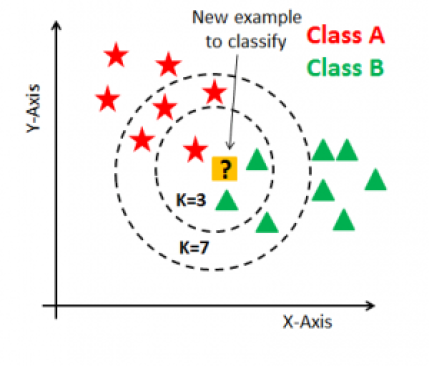

### ตัวอย่างที่ 2 (n_neighbors)
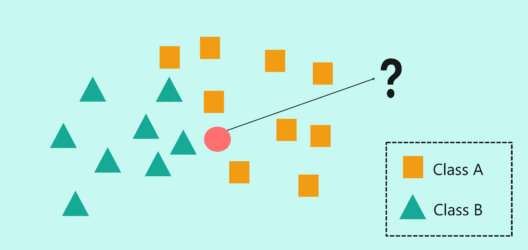

In [7]:
#Import Library of K-Nearest Neighbor model
from sklearn.neighbors import KNeighborsClassifier

In [8]:
#Create a KNN Classifier
KNN_model = KNeighborsClassifier(n_neighbors= 3)

# Train the model using the training sets
# data =['outlook','temperature', 'humidity','windy'] ,class = 'play'
KNN_model.fit(play_tennis[['outlook', 'temperature', 'humidity', 'windy']] , play_tennis['play'])

#Predict Output
predicted= KNN_model.predict([[1,1,0,1]]) # 1:rain, 1:hot, 0:high, 1:weak
print("Predicted Value:", predicted)

Predicted Value: ['yes']


c:\Users\PHinG Jakkaphat\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
